In [8]:
#!/usr/bin/python
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import scipy.stats as stats
from scipy.misc import comb

thor=pd.read_csv('data/thor_all.csv') #import data

rez=600

In [81]:
#genetic distance metric calculation
def diff_letters(a,b):
    diff = sum(a[i] != b[i] for i in range(min(len(a),len(b))))
    return diff+np.abs(len(a)-len(b))

#gets the counts of each genetic distance, takes the data column and a random number to compare sequences between
def get_countz(df,ref_seq):
    HD=[]
    for i in range(df.index[0],df.index[-1]):
        HD.append(diff_letters(ref_seq,df[i]))
    return HD

(array([ 33.,  15.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  11.,   0.,
          4.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]), array([  0.        ,   0.58208955,   1.1641791 ,   1.74626866,
          2.32835821,   2.91044776,   3.49253731,   4.07462687,
          4.65671642,   5.23880597,   5.82089552,   6.40298507,
          6.98507463,   7.56716418,   8.14925373,   8.73134328,
          9.31343284,   9.89552239,  10.47761194,  11.05970149,
         11.64179104,  12.2238806 ,  12.80597015,  13.3880597 ,
         13.97014925,  14.55223881,  15.13432836,  15.71641791,
         16.29850746,  16.88059701,  17.46268657,  18.04477612,
         18.62686567,  19.208

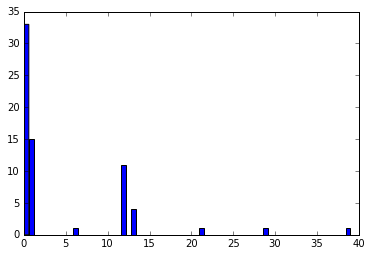

In [83]:
df=thor[(thor['patient']=='B1') & (thor['time']==1.1)]['sequence']

HD=get_countz(df,df[0])
plt.hist(HD,len(HD))

In [92]:
thor[thor['patient']==p]['sequence'].iloc[0]

'CCCTCAGACCCTTTTAGTCAGTGTGGAAAATCTCTAGCA'

In [84]:
def get_patient_info(p):
    if p=='B1':
        
        #temporary data fram
        tdf=thor[thor['patient']=='B1']
        
        #get unique values
        tl = tdf['time'].unique()
                      
        #specific grouping for B1
        plist = [tdf[(tdf['time']==tl[0])],
              tdf[(tdf['time']==tl[1]) | (tdf['time']==tl[2])],
              tdf[(tdf['time']==tl[3]) | (tdf['time']==tl[4])]] 

        cz='slateblue'
        csubs=['navy','slateblue','steelblue']
        mz='o'
        group_list=['1.1','6.3-7.1','11.3-12.7']
        times_avg=[1.1,6.8,12]
        
    if p=='L1':
        
        tdf= thor[thor['patient']==p]
        tl = tdf['time'].unique()
                      
        #specific grouping for B1
        plist = [tdf[(tdf['time']==tl[0]) | (tdf['time']==tl[1])],
                  tdf[tdf['time']==tl[2]],
                  tdf[tdf['time']==tl[3]]]
        cz='limegreen'
        csubs=['darkgreen','olivedrab','limegreen']
        mz='s'
        group_list=['1.0-1.3','4.1','11.8']
        times_avg=[1.1,4,12]

    if p=='R1':
        
        tdf= thor[thor['patient']==p]
        tl = tdf['time'].unique()
              
        #specific grouping for B1
        plist = [tdf[tdf['time']==tl[0]],
                 tdf[tdf['time']==tl[1]],
                 tdf[tdf['time']==tl[2]]]
        cz='indianred'
        csubs=['tomato','peru','pink']
        mz='^'
        times_avg=[1.8,8.2,12.3] 
        group_list=['1.8','8.2','12.3']

    return tl,plist,cz,csubs,mz,times_avg,group_list

In [135]:
df=thor[thor['patient']==p]['sequence']

max_item = df.max()

max_item

'CCCTCAGTCCCTTTTAGTCAGTGTGGAAAATCTCTAGCA'

In [136]:
df

333    CCCTCAGACCCTTTTAGTCAGTGTGGAAAATCTCTAGCA
334    CCCTCAGACCCTTTTAGTCAGTGTGAAAAATCTCTAGCA
335    CCCTCAGACCCTTTTAGTCAGTGTGGAAAATCTCTAGCA
336    CCCTCAGACCCTTTTAGTCAGTGTGGAAAATCTCTAGCA
337    CCCTCAGACCCTTTTAGTCAGTGTGGAAAATCTCTAGCA
338    CCCTCAGACCCTTTTAGTCAGTGTGGAAAATCTCTAGCA
339    CCCTCAGACCCTTTTAGTCAGTGTGGAAAATCTCTAGCA
340    CCCTCAGACCCTTTTAGTCAGTGTGGAAAATCTCTAGCA
341    CCCTCAGACCCTTTTAGTCAGTGTGGAAAATCTCTAGCA
342    CCCTCAGACCCTTTTAGTCAGTGTGGAAAATCTCTAGCA
343    CCCTCAGACCCTTTTAGTCAGTGTGGAAAATCTCTAGCA
344    CCCTCAGACCCTTTTAGTCAGTGTGGAAAATCTCTAGCA
345    CCCTCAGACCCTTTTAGTCAGTGTGGGAAATCTCTAGAA
346    CCCTCAGACCCTTTTAGTCAGTGTGGAAAATCTCTAGCA
347    CCCTCAGACCCTTTTAGTCAGTGTGGAAAATCTCTAGCA
348    CCCTCAGACCCTTTTAGTCATTGTGGAAAATCTCTAGCA
349    CCCTCAGACCCTTTTAGTCAGTGTAGAAAATCTCTAGCA
350    CCCTCAGACCCTTTTAGTCAGTGTGGAAAATCTCTAGCA
351    CCCTCAGACCCTTTTAGTCAGTGTGGAAAATCTCTAGCA
352    CCCTCAGACCCTTTTAGTCAGTGTGAAAAATCTCTAGCA
353    CCCTCAGACCCTTTTAGTCAGTGTGGAAAATCTCTAGCA
354    CCCTCA

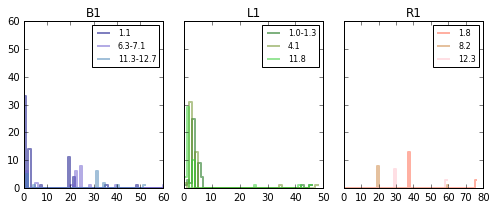

In [145]:
#grouped data rank abundance plots
fig,axarr = plt.subplots(1,3,sharex=False, sharey=True,figsize=(7,3),dpi=rez)
in_p=0
u_rat=[[],[],[]]
t_list=[]
q_list=[]

for p in thor['patient'].unique():
        
    tl,plist,cz,csubs,mz,times_avg,group_list = get_patient_info(p)

    ref_seq=thor[thor['patient']==p]['sequence'].iloc[6]#.max() #use most common sequence as ref
    
    for tp in range(len(plist)): #with grouped time intervals
    
        df = plist[tp]['sequence']
                
        HD=get_countz(df,ref_seq)
        
        h_n,h_k = np.histogram(HD,len(HD))
        
        axarr[in_p].step(range(len(h_n)),h_n,alpha=0.5,color=csubs[tp],lw=2)
        #axarr[in_p].loglog(range(len(h_n)),-np.sort(-h_n)+0.01,alpha=0.5,color=csubs[tp],lw=2)
        axarr[in_p].legend(group_list,fontsize=8)
        
    axarr[in_p].set_title(p)
    in_p+=1

axarr[0].set_xlim([0.1,60])
axarr[0].set_ylim([0.1,60])
plt.tight_layout()

plt.savefig('figures/hd_dist.pdf')
